In [3]:
import torch
import os
import sys
sys.path.append("./")
import yaml
import numpy as np
import h5py

from omegaconf import OmegaConf

from decifer import (
    Tokenizer,
    UnconditionedDecifer,
    DeciferConfig,
    HDF5Dataset,
    extract_prompt,
    load_model_from_checkpoint,
)

In [4]:
def print_hdf5_structure(file_path):
    """
    This function opens an HDF5 file, prints its structure (groups and datasets),
    and allows access to the data.

    Parameters:
    file_path (str): Path to the HDF5 file.
    """
    try:
        with h5py.File(file_path, 'r') as hdf_file:
            # Recursive function to print group structure
            def print_group(name, node):
                if isinstance(node, h5py.Dataset):
                    print(f"Dataset: {name}, Shape: {node.shape}, Dtype: {node.dtype}")
                elif isinstance(node, h5py.Group):
                    print(f"Group: {name}")
                    
            # Visit every node in the file and print details
            hdf_file.visititems(print_group)

            # Return the HDF5 file object to explore it further outside the function
            return hdf_file
    except Exception as e:
        print(f"Error: {e}")

## ad hoc generation

In [5]:
# Config path
config_path = "../testconfig.yaml"
root = "../"

# Get config
with open(config_path, "r") as f:
    yaml_config = yaml.safe_load(f)
config = OmegaConf.create(yaml_config)

# Make dataset from test
h5_test_path = os.path.join(root, config.dataset, "hdf5/test_dataset.h5")
test_dataset = HDF5Dataset(
    h5_test_path,
    ["cif_tokenized"], 
    block_size=10000,
)

# #H5
# tok = Tokenizer()
# # '../data/chili100k/debug_max_500/hdf5/test_dataset.h5'
# with h5py.File(h5_test_path, 'r') as hdf_file:
#     cifs = [tok.decode(hdf_file['cif_tokenized'][i]) for i in range(1)]
#     for cif in cifs:
#         print(cif)
#         print()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpt_path = os.path.join(root, config["out_dir"], 'ckpt.pt')  # Update with your actual checkpoint path

if os.path.exists(ckpt_path):
    model = load_model_from_checkpoint(ckpt_path, device)
else:
    print(f"Checkpoint file not found at {ckpt_path}")
    
model.eval();  # Set the model to evaluation mode

Processing datasets:   0%|          | 0/1 [00:00<?, ?it/s]

number of total parameters: 25.36M


In [7]:
for i, sequence in enumerate(iter(test_dataset)):
    prompt = extract_prompt(sequence[0], model.device, add_composition=True, add_spacegroup=True)
    if prompt is not None:
        model.generate_and_print(prompt.unsqueeze(0), max_new_tokens=1000)
        #print(tok.decode(prompt.cpu().numpy()))
        print("\n")
    if i > 0:
        break

# model.generate_and_print()

data_Re0.55Mo1.45
_symmetry_space_group_name_H-M Im-3m
_cell_length_a 3.7629
_cell_length_b 3.7621
_cell_length_c 3.7629
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 90.0000
_symmetry_Int_Tables_number 229
_chemical_formula_structural Re0.55Mo1.45
_chemical_formula_sum 'Re0.55 Mo1.45'
_cell_volume 26.5424
_cell_formula_units_Z 1
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 'x, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Re Re0 2 0.0000 0.0000 0.0000 0.6000
Mo Mo1 2 0.0000 0.0000 0.0000 0.3300

data_BaRuO3
_symmetry_space_group_name_H-M R-3m
_cell_length_a 4.6120
_cell_length_b 4.6120
_cell_length_c 16.8350
_cell_angle_alpha 90.0000
_cell_angle_beta 90.0000
_cell_angle_gamma 120.0000
_symmetry_Int_Tables_number 166
_chemical_formula_structural BaRuO3
_chemical_formula_sum 'Ba3 Ru3 O18'
_cell_volume 399.2911
_cell_formula_units_Z

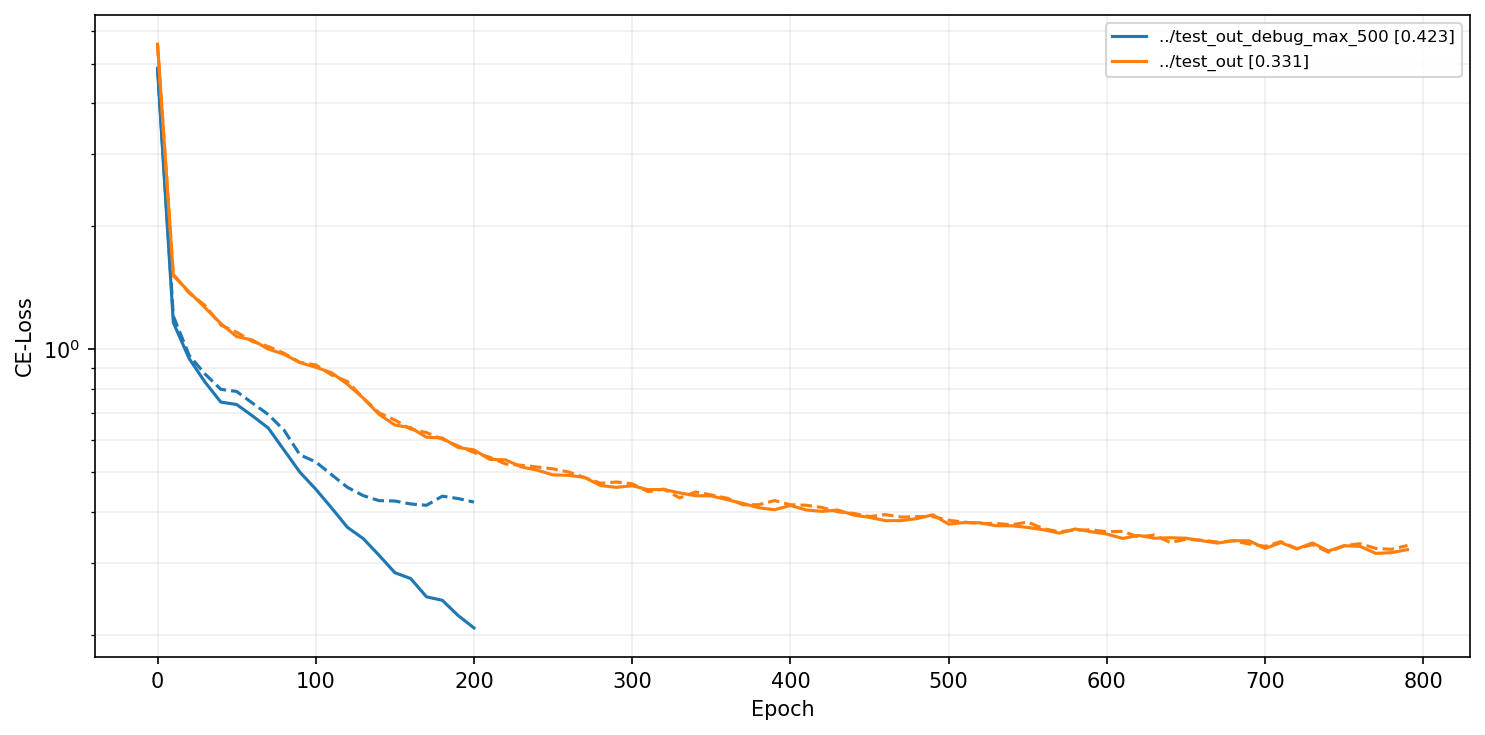

In [2]:
from decifer import (
    plot_loss_curves,
)

plot_loss_curves(
    [
        "../test_out_debug_max_500/ckpt.pt",
        "../test_out/ckpt.pt",
    ],
    ylog = True
)